# Aula - Grid Search e Feature Engineering

## Importando as bibliotecas

In [1]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import pingouin as pg
from pingouin import pairwise_corr
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import pingouin as pg
import random 
import scipy.stats
from scipy import stats
import janitor
from scipy.stats import randint
from sklearn.model_selection import train_test_split


## Configurando gráficos

In [2]:
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (12, 8),
          'axes.labelsize': 'x-large',
          'axes.titlesize':'x-large',
          'xtick.labelsize':'x-large',
          'ytick.labelsize':'x-large'}

%matplotlib inline
plt.rcParams.update(params)

## Original paper 

Chicco, D., & Jurman, G. (2020). Machine learning can predict survival of patients with heart failure from serum creatinine and ejection fraction alone. BMC medical informatics and decision making, 20(1), 1-16.



### Citação: Chicco, D., & Jurman, G. (2020)

## Contexto

- "Cardiovascular diseases kill approximately 17 million people globally every year, and they mainly
exhibit as myocardial infarctions and heart failures. Heart failure (HF) occurs when the heart cannot pump enough
blood to meet the needs of the body". 

### Chicco, D., & Jurman, G. (2020)

## Leitura do arquivo

In [3]:
df = pd.read_csv(r"C:\Users\Angelo\Desktop\Heart Failure\conjunto_de_dados.csv", 
                sep=',',
                engine='python').clean_names() 

In [4]:
df.head()

age  anaemia  creatinine_phosphokinase  diabetes  ejection_fraction  \
0  75.0        0                       582         0                 20   
1  55.0        0                      7861         0                 38   
2  65.0        0                       146         0                 20   
3  50.0        1                       111         0                 20   
4  65.0        1                       160         1                 20   

   high_blood_pressure  platelets  serum_creatinine  serum_sodium  sex  \
0                    1  265000.00               1.9           130    1   
1                    0  263358.03               1.1           136    1   
2                    0  162000.00               1.3           129    1   
3                    0  210000.00               1.9           137    1   
4                    0  327000.00               2.7           116    0   

   smoking  time  death_event  
0        0     4            1  
1        0     6            1  
2        1     7            1  
3        0     7            1  
4        0     8            1

## Verificação de campos nulos

In [5]:
df.isna().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
death_event                 0
dtype: int64

## Verificação do tipo de cada coluna

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  death_event               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


# Tipo de variável 

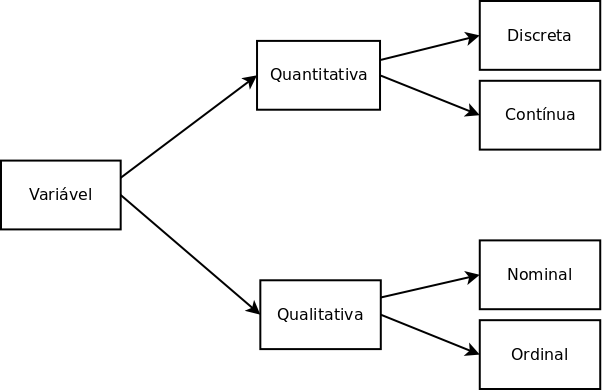

In [7]:
df.head()

age  anaemia  creatinine_phosphokinase  diabetes  ejection_fraction  \
0  75.0        0                       582         0                 20   
1  55.0        0                      7861         0                 38   
2  65.0        0                       146         0                 20   
3  50.0        1                       111         0                 20   
4  65.0        1                       160         1                 20   

   high_blood_pressure  platelets  serum_creatinine  serum_sodium  sex  \
0                    1  265000.00               1.9           130    1   
1                    0  263358.03               1.1           136    1   
2                    0  162000.00               1.3           129    1   
3                    0  210000.00               1.9           137    1   
4                    0  327000.00               2.7           116    0   

   smoking  time  death_event  
0        0     4            1  
1        0     6            1  
2        1     7            1  
3        0     7            1  
4        0     8            1

###  Contando o número de observações distintas

In [8]:
df.diabetes.nunique()

2

###  Mostrar as observações distintas

In [9]:
df.diabetes.unique()

array([0, 1], dtype=int64)

### Mudando o tipo da variável de int64 para objeto

In [10]:
df['diabetes'] = df['diabetes'].astype(object)

df['anaemia'] = df['anaemia'].astype(object)

df['death_event'] = df['death_event'].astype(object)

df['high_blood_pressure'] = df['high_blood_pressure'].astype(object)

df['sex'] = df['sex'].astype(object)

df['smoking'] = df['smoking'].astype(object)


## Criando uma nova variável com a quantidade de problemas de saúde

In [11]:
df['escore'] = df['anaemia'] + df['diabetes'] + df['high_blood_pressure'] +  df['smoking']

## Criando uma variável usando função transform

In [12]:
df['platelets_ml'] = df['platelets'].transform(func = lambda x : x / 10**3)

In [13]:
df = df.drop(columns='time')

### Verificação das colunas do Dataset

In [14]:
df.head()

age anaemia  creatinine_phosphokinase diabetes  ejection_fraction  \
0  75.0       0                       582        0                 20   
1  55.0       0                      7861        0                 38   
2  65.0       0                       146        0                 20   
3  50.0       1                       111        0                 20   
4  65.0       1                       160        1                 20   

  high_blood_pressure  platelets  serum_creatinine  serum_sodium sex smoking  \
0                   1  265000.00               1.9           130   1       0   
1                   0  263358.03               1.1           136   1       0   
2                   0  162000.00               1.3           129   1       1   
3                   0  210000.00               1.9           137   1       0   
4                   0  327000.00               2.7           116   0       0   

  death_event escore  platelets_ml  
0           1      1     265.00000  
1           1      0     263.35803  
2           1      1     162.00000  
3           1      1     210.00000  
4           1      2     327.00000

### Medidas de posição

- Média: Use a média para descrever um conjunto inteiro de observações com um único valor representando o centro dos dados.

- Mediana: Se o conjunto de dados contiver um número ímpar de valores, a mediana é o valor no meio do conjunto de dados solicitados. Em um conjunto de dados em que há um número par de valores, a mediana é a média dos dois valores médios. Por exemplo, para o conjunto dos números 1, 2, 3, 21, 35, 42, a mediana é a média dos dois valores médios (3 e 21), que é 12.

- Moda: É chamado de moda o dado mais frequente de um conjunto de dados.

### Exemplo:

Vamos calcular a média de idade dos pacientes avaliados.

In [15]:
df.age.mean()

60.83389297658862

### Exemplo 

Vamos calcular a mediana de idade dos pacientes avaliados.

In [16]:
df.age.median()

60.0

# Medidas de dispersão

Desvio padrão: Mede aproximadamente a distância "média" das observações individuais a partir da média. Quanto maior o desvio padrão, maior a dispersão nos dados.

## Calculando desvio padrão utilizando numpy


In [17]:
np.std(df.age)

11.874901429842662

## Informações descritivas sumarizadas

In [18]:
df.describe()

age  creatinine_phosphokinase  ejection_fraction      platelets  \
count  299.000000                299.000000         299.000000     299.000000   
mean    60.833893                581.839465          38.083612  263358.029264   
std     11.894809                970.287881          11.834841   97804.236869   
min     40.000000                 23.000000          14.000000   25100.000000   
25%     51.000000                116.500000          30.000000  212500.000000   
50%     60.000000                250.000000          38.000000  262000.000000   
75%     70.000000                582.000000          45.000000  303500.000000   
max     95.000000               7861.000000          80.000000  850000.000000   

       serum_creatinine  serum_sodium  platelets_ml  
count         299.00000    299.000000    299.000000  
mean            1.39388    136.625418    263.358029  
std             1.03451      4.412477     97.804237  
min             0.50000    113.000000     25.100000  
25%             0.90000    134.000000    212.500000  
50%             1.10000    137.000000    262.000000  
75%             1.40000    140.000000    303.500000  
max             9.40000    148.000000    850.000000

### Alguns tipos de visualizações importantes 

### Histograma

Quando usar o histograma: Quando quiser examinar a forma e dispersão de seus dados. Um histograma divide valores em intervalos e representa a frequência dos valores de dados.

In [19]:
sns.histplot(data=df, x="ejection_fraction", hue="death_event", fill=False,
             cumulative=False, stat="density", common_norm=False, bins=20)
plt.xlabel('Fração de ejeção')
plt.ylabel('Frequência')
plt.title('Histograma de fração de ejeção')
plt.grid(True)
plt.show()

In [20]:
sns.histplot(data=df, x="ejection_fraction", hue="death_event", fill=False,
             cumulative=True, stat="density", common_norm=False, bins=60)
plt.xlabel('Fração de ejeção')
plt.ylabel('Frequência')
plt.title('Histograma de fração de ejeção')
plt.grid(True)
plt.show()

In [21]:
for i in range(0,100,5):
    print('Frequência acumulada da variável ejection fraction de não sobreviventes '\
          + str(i)\
          + ':',\
          df[(df['death_event']==1)\
             & (df['ejection_fraction']<i)].shape[0]
          / df[df['death_event']==1].shape[0])   

Frequência acumulada da variável ejection fraction de não sobreviventes 0: 0.0
Frequência acumulada da variável ejection fraction de não sobreviventes 5: 0.0
Frequência acumulada da variável ejection fraction de não sobreviventes 10: 0.0
Frequência acumulada da variável ejection fraction de não sobreviventes 15: 0.010416666666666666
Frequência acumulada da variável ejection fraction de não sobreviventes 20: 0.041666666666666664
Frequência acumulada da variável ejection fraction de não sobreviventes 25: 0.20833333333333334
Frequência acumulada da variável ejection fraction de não sobreviventes 30: 0.3958333333333333
Frequência acumulada da variável ejection fraction de não sobreviventes 35: 0.53125
Frequência acumulada da variável ejection fraction de não sobreviventes 40: 0.7604166666666666
Frequência acumulada da variável ejection fraction de não sobreviventes 45: 0.8020833333333334
Frequência acumulada da variável ejection fraction de não sobreviventes 50: 0.8541666666666666
Frequênc

In [22]:
for i in range(0,100,5):
    print('Frequência acumulada ejection fraction de sobreviventes '\
          + str(i)\
          + ':',\
          df[(df['death_event']==0)\
             & (df['ejection_fraction']<i)].shape[0]
          / df[df['death_event']==0].shape[0])   

Frequência acumulada ejection fraction de sobreviventes 0: 0.0
Frequência acumulada ejection fraction de sobreviventes 5: 0.0
Frequência acumulada ejection fraction de sobreviventes 10: 0.0
Frequência acumulada ejection fraction de sobreviventes 15: 0.0
Frequência acumulada ejection fraction de sobreviventes 20: 0.0049261083743842365
Frequência acumulada ejection fraction de sobreviventes 25: 0.014778325123152709
Frequência acumulada ejection fraction de sobreviventes 30: 0.10344827586206896
Frequência acumulada ejection fraction de sobreviventes 35: 0.20689655172413793
Frequência acumulada ejection fraction de sobreviventes 40: 0.5369458128078818
Frequência acumulada ejection fraction de sobreviventes 45: 0.6995073891625616
Frequência acumulada ejection fraction de sobreviventes 50: 0.7733990147783252
Frequência acumulada ejection fraction de sobreviventes 55: 0.8472906403940886
Frequência acumulada ejection fraction de sobreviventes 60: 0.8571428571428571
Frequência acumulada ejectio

In [23]:
sns.histplot(data=df, x="serum_creatinine", hue="death_event", element="step", fill=False, 
             cumulative=True, stat="density", common_norm=False)
plt.xlabel('Creatinine')
plt.ylabel('Frequência')
plt.title('Histogram of Ejection Fraction')
plt.grid(True)
plt.show()

In [24]:
df[(df['death_event']==1) & (df['serum_creatinine']<2)].shape[0] / df[df['death_event']==1].shape[0]

0.7708333333333334

In [25]:
for i in range(0,11,1):
    print('Frequência acumulada de não sobreviventes com creatina de '\
          + str(i)\
          + ':',\
          df[(df['death_event']==1)\
             & (df['serum_creatinine']<i)].shape[0]
          / df[df['death_event']==1].shape[0])   
    

Frequência acumulada de não sobreviventes com creatina de 0: 0.0
Frequência acumulada de não sobreviventes com creatina de 1: 0.09375
Frequência acumulada de não sobreviventes com creatina de 2: 0.7708333333333334
Frequência acumulada de não sobreviventes com creatina de 3: 0.8958333333333334
Frequência acumulada de não sobreviventes com creatina de 4: 0.9375
Frequência acumulada de não sobreviventes com creatina de 5: 0.9583333333333334
Frequência acumulada de não sobreviventes com creatina de 6: 0.96875
Frequência acumulada de não sobreviventes com creatina de 7: 0.9791666666666666
Frequência acumulada de não sobreviventes com creatina de 8: 0.9791666666666666
Frequência acumulada de não sobreviventes com creatina de 9: 0.9791666666666666
Frequência acumulada de não sobreviventes com creatina de 10: 1.0


In [26]:
df[(df['death_event']==0) & (df['serum_creatinine']<2)].shape[0] / df[df['death_event']==0].shape[0]

0.9359605911330049

In [27]:
for i in range(0,11,1):
    print('Frequência acumulada de sobreviventes com creatina de '\
          + str(i)\
          + ':',\
          df[(df['death_event']==0)\
             & (df['serum_creatinine']<i)].shape[0]
          / df[df['death_event']==0].shape[0])   

Frequência acumulada de sobreviventes com creatina de 0: 0.0
Frequência acumulada de sobreviventes com creatina de 1: 0.35467980295566504
Frequência acumulada de sobreviventes com creatina de 2: 0.9359605911330049
Frequência acumulada de sobreviventes com creatina de 3: 0.9704433497536946
Frequência acumulada de sobreviventes com creatina de 4: 0.9901477832512315
Frequência acumulada de sobreviventes com creatina de 5: 0.9901477832512315
Frequência acumulada de sobreviventes com creatina de 6: 0.9950738916256158
Frequência acumulada de sobreviventes com creatina de 7: 1.0
Frequência acumulada de sobreviventes com creatina de 8: 1.0
Frequência acumulada de sobreviventes com creatina de 9: 1.0
Frequência acumulada de sobreviventes com creatina de 10: 1.0


In [28]:
df.head()

age anaemia  creatinine_phosphokinase diabetes  ejection_fraction  \
0  75.0       0                       582        0                 20   
1  55.0       0                      7861        0                 38   
2  65.0       0                       146        0                 20   
3  50.0       1                       111        0                 20   
4  65.0       1                       160        1                 20   

  high_blood_pressure  platelets  serum_creatinine  serum_sodium sex smoking  \
0                   1  265000.00               1.9           130   1       0   
1                   0  263358.03               1.1           136   1       0   
2                   0  162000.00               1.3           129   1       1   
3                   0  210000.00               1.9           137   1       0   
4                   0  327000.00               2.7           116   0       0   

  death_event escore  platelets_ml  
0           1      1     265.00000  
1           1      0     263.35803  
2           1      1     162.00000  
3           1      1     210.00000  
4           1      2     327.00000

## Boxplot

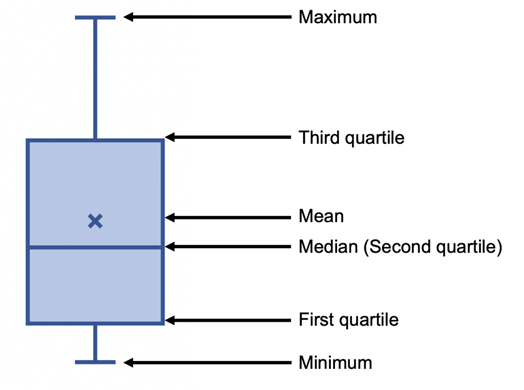




## ARTES, Rinaldo. Coeficiente de assimetria. Material Didático Insper, 2014.

## Criando um boxplot

Text(0.5, 1.0, 'Boxplot de Ejection Fraction por grupo')

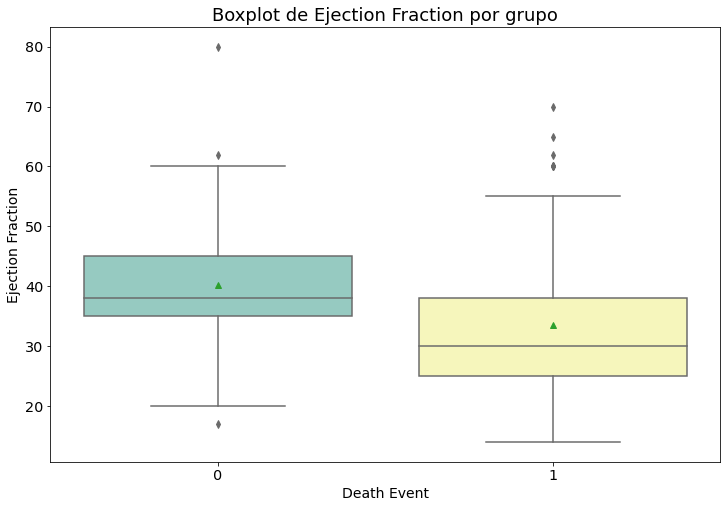

In [29]:
fig = sns.boxplot(data = df, x="death_event", y="ejection_fraction",
                  showmeans = True, palette="Set3")
plt.ylabel("Ejection Fraction", size=14)
plt.xlabel("Death Event", size=14)
plt.title("Boxplot de Ejection Fraction por grupo", size=18)

##  Scatter plot - Gráfico de dispersão

Text(0.5, 1.0, 'Creatina em função da idade')

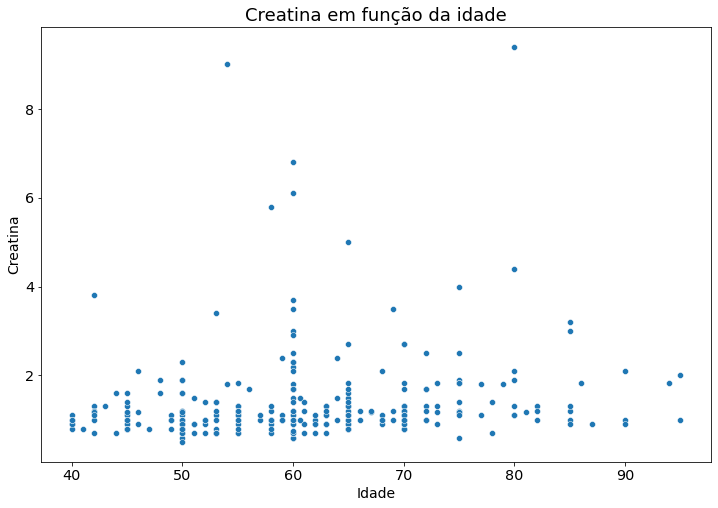

In [30]:
sns.scatterplot(data=df, x="age", y="serum_creatinine")
plt.ylabel("Creatina", size=14)
plt.xlabel("Idade", size=14)
plt.title("Creatina em função da idade", size=18)

## Função para calcular outliers

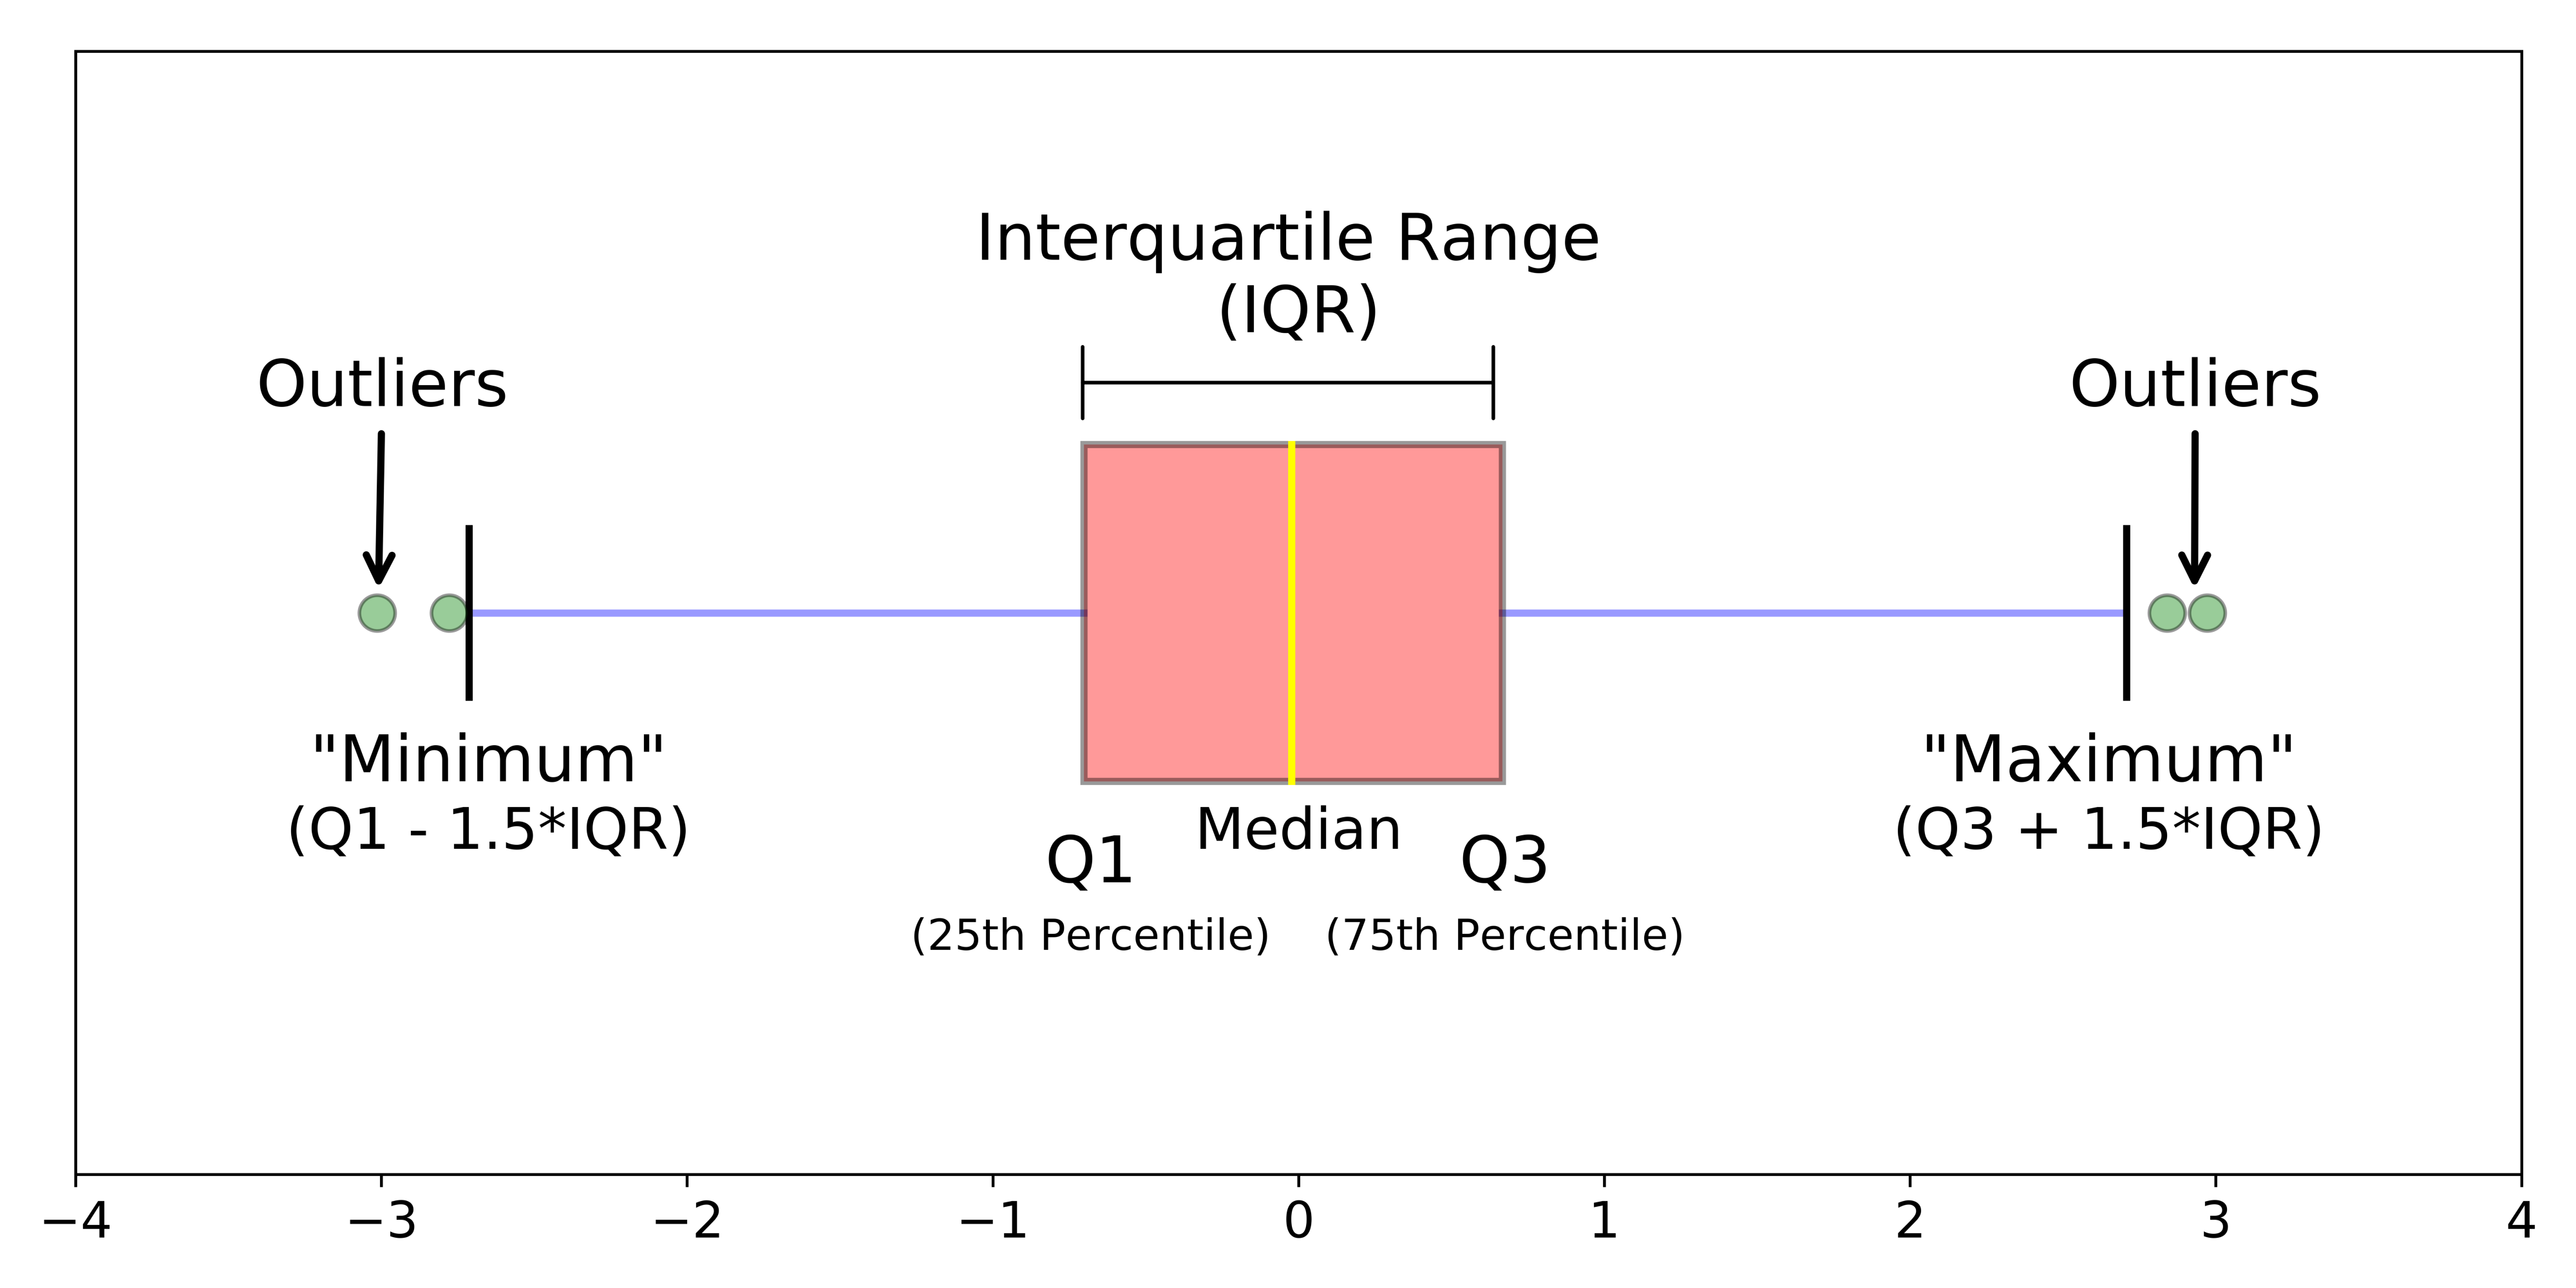

In [31]:
def limite_interquartil(df, variavel, distancia):

    IQR = df[variavel].quantile(0.75) - df[variavel].quantile(0.25)

    limite_inferior = df[variavel].quantile(0.25) - (IQR * distancia)
    limite_superior = df[variavel].quantile(0.75) + (IQR * distancia)

    return limite_superior,  limite_inferior

## Aplicando a função

In [32]:
limite_superior,  limite_inferior = limite_interquartil(df, 'serum_creatinine', 1.5)
limite_superior,  limite_inferior 

(2.1499999999999995, 0.15000000000000024)

## Criando um flag para outliers

In [33]:
df['outliers'] = np.where(df['serum_creatinine'] > limite_superior, 'outliers',
            np.where(df['serum_creatinine'] < limite_inferior, 'outliers', 'inliers'))

In [34]:
df.head()

age anaemia  creatinine_phosphokinase diabetes  ejection_fraction  \
0  75.0       0                       582        0                 20   
1  55.0       0                      7861        0                 38   
2  65.0       0                       146        0                 20   
3  50.0       1                       111        0                 20   
4  65.0       1                       160        1                 20   

  high_blood_pressure  platelets  serum_creatinine  serum_sodium sex smoking  \
0                   1  265000.00               1.9           130   1       0   
1                   0  263358.03               1.1           136   1       0   
2                   0  162000.00               1.3           129   1       1   
3                   0  210000.00               1.9           137   1       0   
4                   0  327000.00               2.7           116   0       0   

  death_event escore  platelets_ml  outliers  
0           1      1     265.00000   inliers  
1           1      0     263.35803   inliers  
2           1      1     162.00000   inliers  
3           1      1     210.00000   inliers  
4           1      2     327.00000  outliers

# Cálculo de outliers a partir dos percentiles  

In [35]:
P = np.percentile(df.serum_creatinine, [5, 95])
new_df = df[(df.serum_creatinine > P[0]) & (df.serum_creatinine < P[1])]

In [36]:
new_df.shape

(259, 15)

## Visualizando a remoção dos outliers

Text(0.5, 0, 'Age')

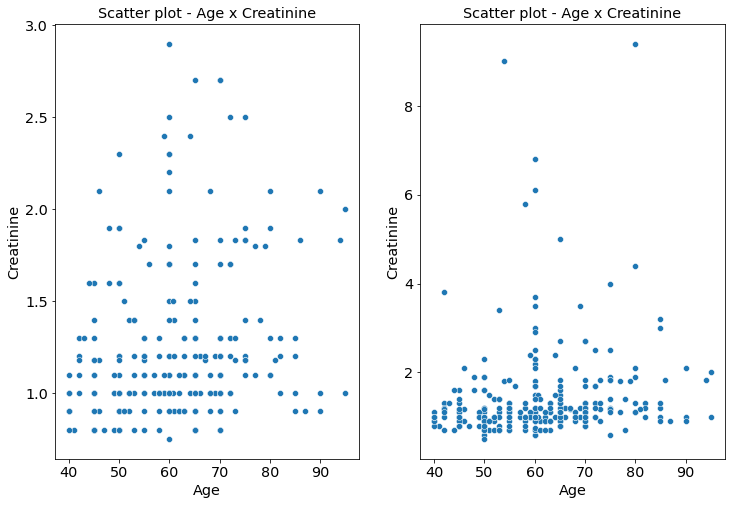

In [37]:
fig, axes = plt.subplots(1, 2)

sns.scatterplot(data = new_df, x="age", y="serum_creatinine",ax=axes[0])
axes[0].set_title('Scatter plot - Age x Creatinine')
axes[0].set_ylabel('Creatinine')
axes[0].set_xlabel('Age')

sns.scatterplot(data = df, x="age", y="serum_creatinine",ax=axes[1])
axes[1].set_title('Scatter plot - Age x Creatinine')
axes[1].set_ylabel('Creatinine')
axes[1].set_xlabel('Age')

### Heatmap - Função de autocorrelação 

<AxesSubplot:>

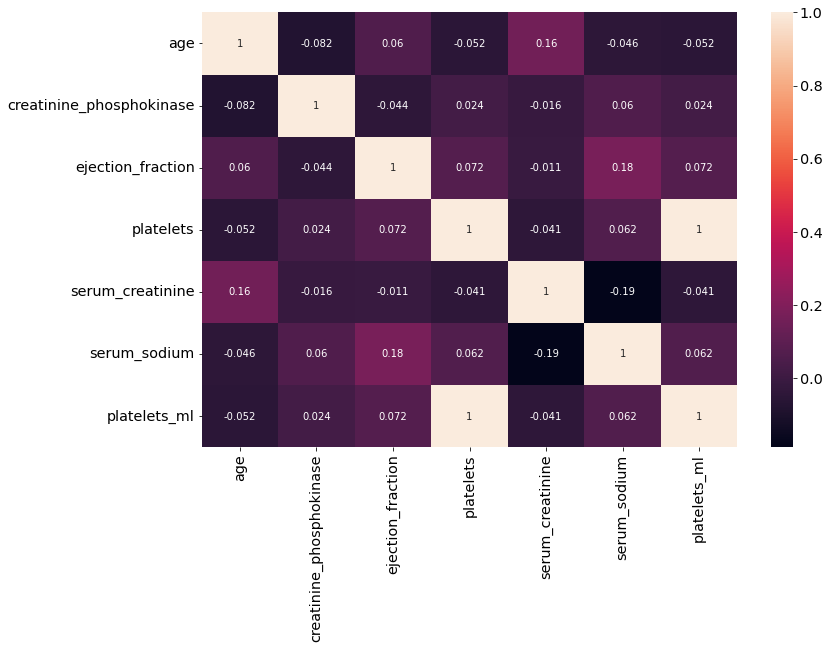

In [38]:
sns.heatmap(data = df.corr(), annot=True)

# Calculando as correlações

In [39]:
pg.pairwise_corr(df, method='pearson', alternative='greater').round(3)[0:10]

X                         Y   method alternative  \
0                       age  creatinine_phosphokinase  pearson     greater   
1                       age         ejection_fraction  pearson     greater   
2                       age                 platelets  pearson     greater   
3                       age          serum_creatinine  pearson     greater   
4                       age              serum_sodium  pearson     greater   
5                       age              platelets_ml  pearson     greater   
6  creatinine_phosphokinase         ejection_fraction  pearson     greater   
7  creatinine_phosphokinase                 platelets  pearson     greater   
8  creatinine_phosphokinase          serum_creatinine  pearson     greater   
9  creatinine_phosphokinase              serum_sodium  pearson     greater   

     n      r         CI95%  p-unc   BF10  power  
0  299 -0.082  [-0.18, 1.0]  0.920  0.031  0.001  
1  299  0.060  [-0.04, 1.0]  0.150   0.21  0.272  
2  299 -0.052  [-0.15, 1.0]  0.817   0.04  0.005  
3  299  0.159   [0.06, 1.0]  0.003  6.367  0.869  
4  299 -0.046  [-0.14, 1.0]  0.786  0.043  0.007  
5  299 -0.052  [-0.15, 1.0]  0.817   0.04  0.005  
6  299 -0.044  [-0.14, 1.0]  0.776  0.043  0.008  
7  299  0.024  [-0.07, 1.0]  0.337  0.105  0.111  
8  299 -0.016  [-0.11, 1.0]  0.611  0.059  0.027  
9  299  0.060  [-0.04, 1.0]  0.152  0.207  0.269

## Discretizando variável

In [40]:
print("Idade mínima " + str(df.age.min()) + ' e idade máxima ' + str(df.age.max()))

Idade mínima 40.0 e idade máxima 95.0


In [41]:
df['age_categorica'] = pd.qcut(df.age, q = 3, labels=["adulto", "maduro","idoso"])
df.head()

age anaemia  creatinine_phosphokinase diabetes  ejection_fraction  \
0  75.0       0                       582        0                 20   
1  55.0       0                      7861        0                 38   
2  65.0       0                       146        0                 20   
3  50.0       1                       111        0                 20   
4  65.0       1                       160        1                 20   

  high_blood_pressure  platelets  serum_creatinine  serum_sodium sex smoking  \
0                   1  265000.00               1.9           130   1       0   
1                   0  263358.03               1.1           136   1       0   
2                   0  162000.00               1.3           129   1       1   
3                   0  210000.00               1.9           137   1       0   
4                   0  327000.00               2.7           116   0       0   

  death_event escore  platelets_ml  outliers age_categorica  
0           1      1     265.00000   inliers          idoso  
1           1      0     263.35803   inliers         adulto  
2           1      1     162.00000   inliers         maduro  
3           1      1     210.00000   inliers         adulto  
4           1      2     327.00000  outliers         maduro

## Group by




In [42]:
df.groupby(['death_event']).agg({'ejection_fraction':'median','platelets':'median','age':'std'})

ejection_fraction  platelets        age
death_event                                         
0                         38.0   263000.0  10.637890
1                         30.0   258500.0  13.214556

## Pivot table - Transformando um linha em coluna 

In [43]:
tabela = pd.pivot_table(df, values='ejection_fraction', columns=['diabetes','sex'], aggfunc=np.mean)

In [44]:
tabela.head()

diabetes               0                 1           
sex                    0      1          0          1
ejection_fraction  41.56  36.75  39.472727  36.871429

## Breve descrição de uma árvore de decisão

## Entropia é a impureza dos dados

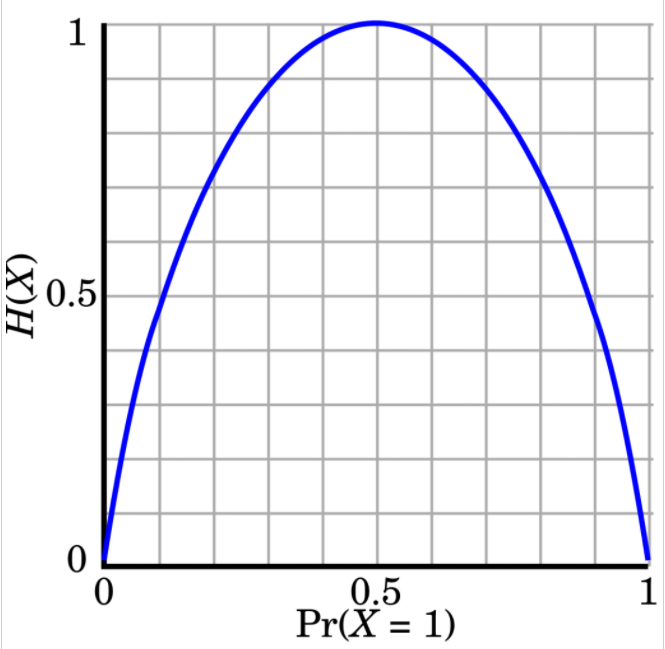

## O objetico da árvore de decisão é reduzir a impureza dos dados através de um conjunto de regras (if-else)

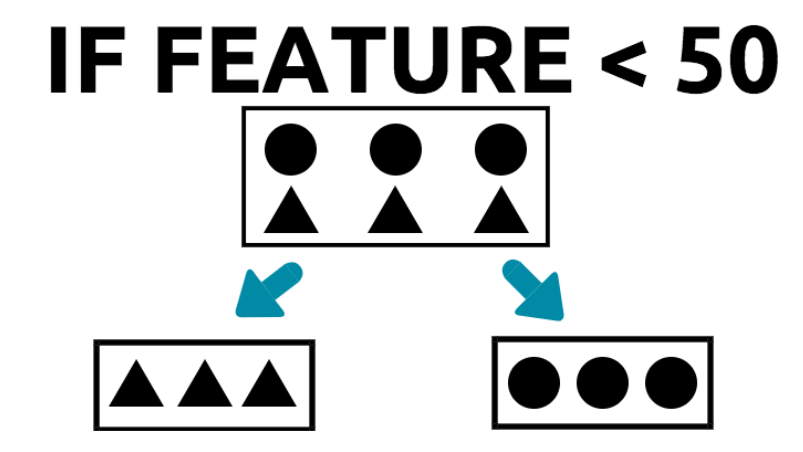

Fonte: Jolly, K. (2018). Machine Learning with scikit-learn Quick Start Guide: Classification, regression, and clustering techniques in Python. Packt Publishing Ltd.

## Aplicando um algoritmo de classificação 

In [45]:
from sklearn import tree
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

In [46]:
y = df.loc[:,'death_event'].astype(int)

X = df.drop(columns=['death_event','outliers','age_categorica'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

## Árvore de decisão 

Fit é sinônimo de treinamento é como o algoritmo utiliza o X_train e y_train para aprender os parâmetros do algoritmo. 

In [47]:
clt = tree.DecisionTreeClassifier(max_depth=3)
clt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3)

## Prevendo os valores usando o modelo treinado

In [48]:
y_train_pred = clt.predict(X_train)
y_test_pred = clt.predict(X_test)

In [49]:
y_test_pred

array([1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0])

## Performance do modelo - Comparando os valores previstos com os valores reais

In [50]:
confusion_matrix(y_train, y_train_pred)

array([[138,   8],
       [ 27,  27]], dtype=int64)

In [51]:
confusion_matrix(y_test, y_test_pred)

array([[51,  6],
       [26, 16]], dtype=int64)

## Feature importance

In [52]:
dicio = []

for i,j in zip(X_train.columns,clt.feature_importances_): 
    dicio.append([i,j])
    tab = pd.DataFrame(dicio,columns = ['variavel','importancia'])
    tab = tab.sort_values(by='importancia',ascending=False)
    

In [53]:
tab

variavel  importancia
7           serum_creatinine     0.622357
4          ejection_fraction     0.216909
0                        age     0.099129
8               serum_sodium     0.061604
1                    anaemia     0.000000
2   creatinine_phosphokinase     0.000000
3                   diabetes     0.000000
5        high_blood_pressure     0.000000
6                  platelets     0.000000
9                        sex     0.000000
10                   smoking     0.000000
11                    escore     0.000000
12              platelets_ml     0.000000

In [54]:
ax = (pd.Series(clt.feature_importances_, index=X.columns)
   .nlargest(4)
   .plot(kind='barh'))

ax.invert_yaxis()

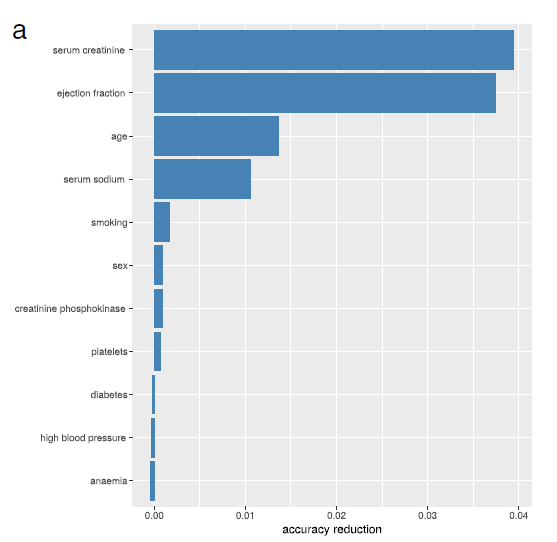

## Visualização da árvore de decisão

In [55]:
dot_data = tree.export_graphviz(clt, out_file=None,
                                feature_names = X_train.columns,
                                filled=True, 
                                class_names=True)

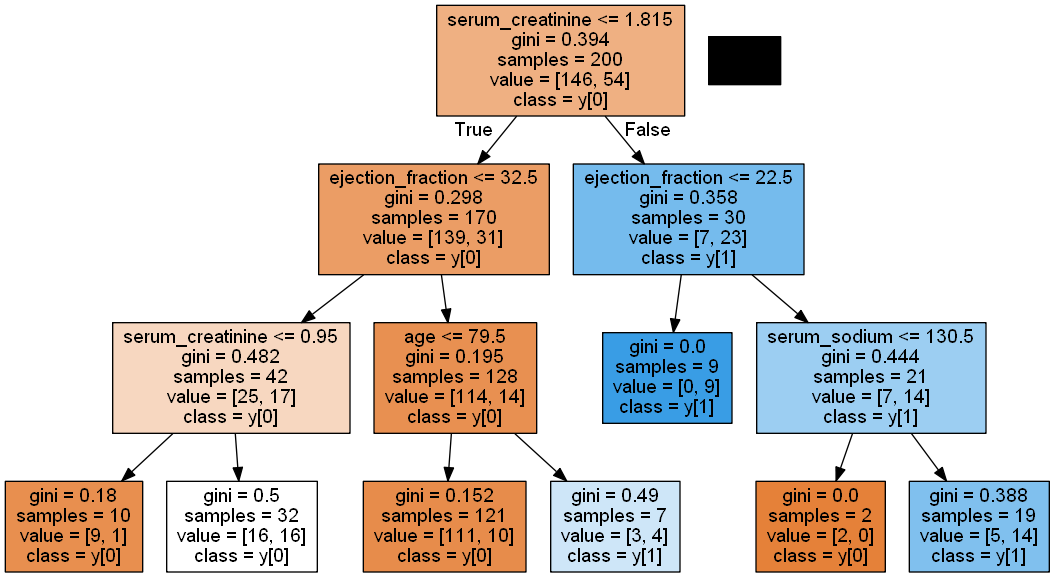

In [56]:
import os
from IPython.display import Image
import pydotplus

os.environ['PATH']=os.environ['PATH']+';'+os.environ['CONDA_PREFIX']+r"\Library\bin\graphviz"
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

## Acurácia a partir da árvore de decisão

In [57]:
accuracy_score(y_train, y_train_pred)

0.825

In [58]:
(9+16+111+4+9+2+14)/200

0.825

## Recall a partir da árvore de decisão

In [59]:
recall_score(y_train, y_train_pred)

0.5

In [60]:
(14+4+9)/(54)

0.5

## Precisão a partir da árvore de decisão

In [61]:
precision_score(y_train, y_train_pred)

0.7714285714285715

In [62]:
(14+4+9)/(19+9+7)

0.7714285714285715

## Boundaries da árvore de decisão

In [63]:
def plot_decision_boundary(clf, x, y):

 feature_names = x.columns
 x, y = x.values, y.values

 x_min, x_max = x[:,0].min(), x[:,0].max()
 y_min, y_max = x[:,1].min(), x[:,1].max()

 step = 0.02

 xx, yy = np.meshgrid(
 np.arange(x_min, x_max, step),
 np.arange(y_min, y_max, step)
 )
 Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
 Z = Z.reshape(xx.shape)

 plt.figure(figsize=(12,8))
 plt.contourf(xx, yy, Z, cmap='Paired_r', alpha=0.25)
 plt.contour(xx, yy, Z, colors='k', linewidths=0.7)
 plt.scatter(x[:,0], x[:,1], c=y, edgecolors='k')
 plt.title("Tree's Decision Boundaries")
 plt.xlabel(feature_names[0])
 plt.ylabel(feature_names[1])


### Citação: Amr, T. (2020). Hands-On Machine Learning with scikit-learn and Scientific Python Toolkits: A practical guide to implementing supervised and unsupervised machine learning algorithms in Python. Packt Publishing Ltd.

## Visualização do boundary  da árvore de decisão

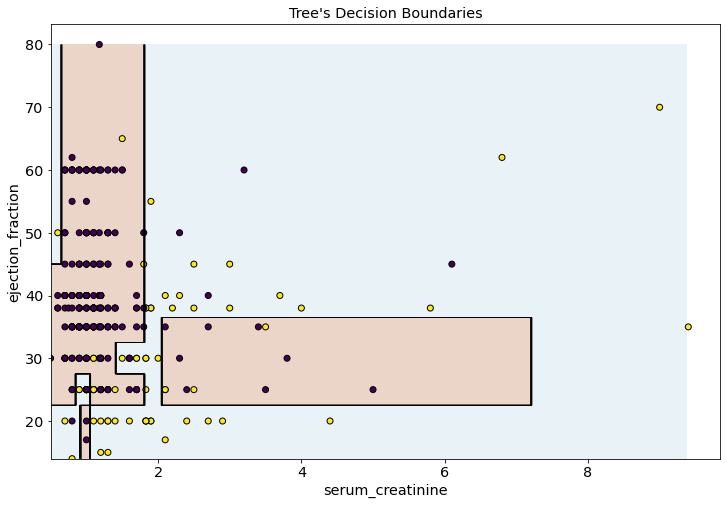

In [64]:
x = df[['serum_creatinine', 'ejection_fraction']]
y = df['death_event'].astype(int)
clt = tree.DecisionTreeClassifier(max_depth=5, random_state=1234)
clt.fit(x, y)

plot_decision_boundary(clt, x, y)

## Tunando o modelo para obter um melhor acurácia 

## Grid Search

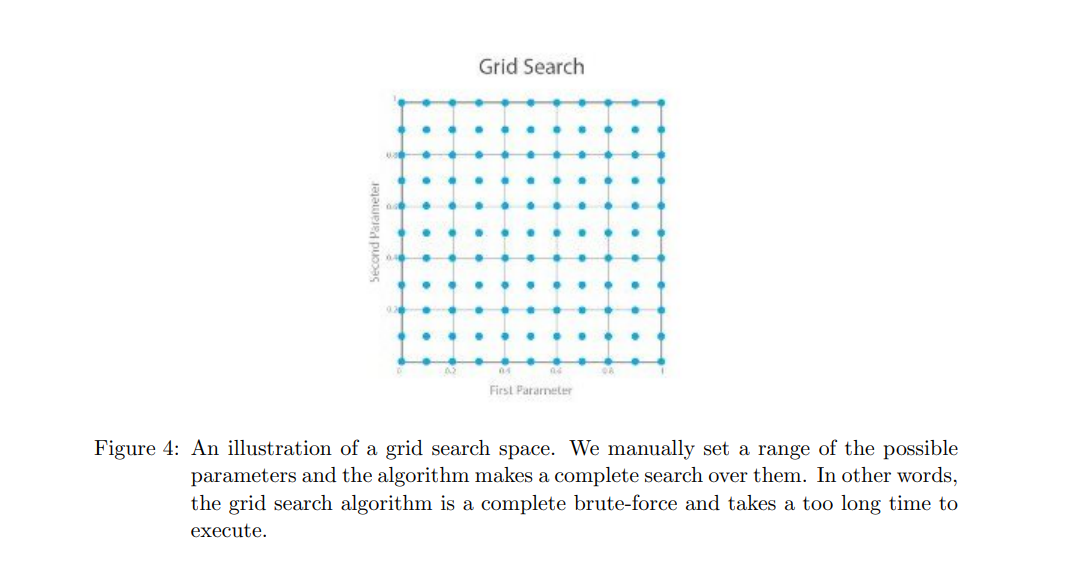


Citação: Liashchynskyi, P., & Liashchynskyi, P. (2019). Grid search, random search, genetic algorithm: a big comparison for NAS. arXiv preprint arXiv:1912.06059.

In [65]:
param_grid = {'min_samples_split':[5,10,15,20]
              ,'max_depth': [2,3,4,5]}

In [66]:
from sklearn.model_selection import GridSearchCV

est = tree.DecisionTreeClassifier()

grid_search = GridSearchCV(est,
                           param_grid,
                           n_jobs=-1,
                           scoring='accuracy',
                           cv=5)

In [67]:
clt = grid_search.fit(X,y)

In [68]:
print("Tuned Decision Tree Parameters: {}".format(clt.best_params_))
print("Best score is {}".format(clt.best_score_))

Tuned Decision Tree Parameters: {'max_depth': 4, 'min_samples_split': 15}
Best score is 0.7490960451977401


## Random Search 

In [69]:
from sklearn.model_selection import RandomizedSearchCV

In [70]:
est = tree.DecisionTreeClassifier()

param_grid = {'min_samples_split':[5,8,10,12,15,20]
              ,'max_depth': [2,3,4,5],
              'min_samples_leaf' : [1, 3, 4,5] }

random_clt = RandomizedSearchCV(estimator = est,\
                         param_distributions = param_grid,\
                         scoring = 'precision', cv=10, n_iter = 1000)

In [71]:
random_clt = random_clt.fit(X,y)

In [72]:
print("Tuned Decision Tree Parameters: {}".format(random_clt.best_params_))
print("Best score is {}".format(random_clt.best_score_))

Tuned Decision Tree Parameters: {'min_samples_split': 20, 'min_samples_leaf': 4, 'max_depth': 4}
Best score is 0.6096428571428572
